In [1]:
import numpy as np
import matplotlib.pyplot as plt

## mnli

In [4]:
mnli_eval_acc = [70.99337, 74.51859, 76.48497, 77.46306, 78.22720, 
                 78.90983, 79.21548, 79.71472, 79.88792, 80.11207]
mnli_mm_eval_acc = [72.95565, 76.38323, 77.87835, 78.55980, 78.88527, 
                    79.69894, 79.99735, 80.29902, 80.66514, 81.16354]
data_pct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

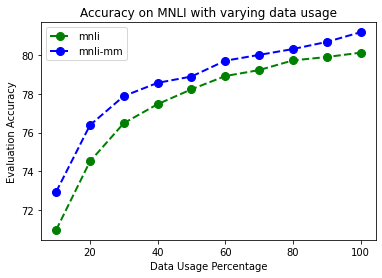

In [14]:
plt.plot(data_pct, mnli_eval_acc, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='mnli')
plt.plot(data_pct, mnli_mm_eval_acc, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='mnli-mm')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Accuracy on MNLI with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_mnli_mm_graph.png')

In [13]:
hans_entailed_lexical = [0.0196, 0.1626, 0.1046, 0.276, 0.0596, 0.0192, 
                 0.0788, 0.1324, 0.4688, 0.0562]
hans_entailed_subsequence = [0.0146, 0.0956, 0.0866, 0.2222, 0.044,
                            0.021, 0.0592, 0.159, 0.377, 0.0552]
hans_entailed_constituent = [0.0118, 0.0866, 0.1164, 0.1364, 0.042,
                            0.0184, 0.056, 0.1278, 0.4382,  0.028]
hans_non_entailed_lexical = [0.9776, 0.8396, 0.9012, 0.7572, 0.9548,
                            0.984, 0.9466, 0.9168, 0.5936, 0.9782]
hans_non_entailed_subsequence = [0.9858, 0.862, 0.8958, 0.775, 0.9498,
                                 0.9786, 0.934, 0.8788, 0.5972, 0.9684]
hans_non_entailed_constituent = [0.991, 0.9364, 0.9098, 0.9138, 0.98,
                                0.9926, 0.974, 0.9502, 0.7106, 0.9904]

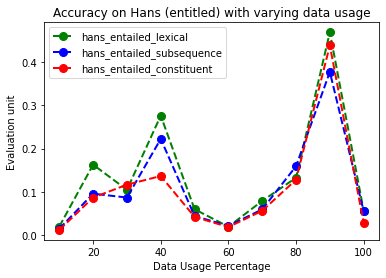

In [15]:
plt.plot(data_pct, hans_entailed_lexical, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_entailed_lexical')
plt.plot(data_pct, hans_entailed_subsequence, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_entailed_subsequence')
plt.plot(data_pct, hans_entailed_constituent, color='red', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_entailed_constituent')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation unit')
plt.title('Accuracy on Hans (entitled) with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_entailed.png')

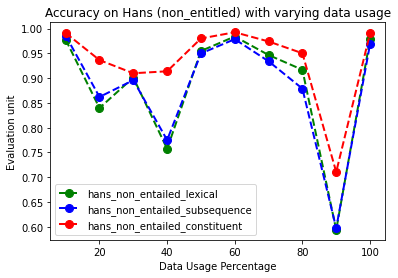

In [16]:
plt.plot(data_pct, hans_non_entailed_lexical, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_non_entailed_lexical')
plt.plot(data_pct, hans_non_entailed_subsequence, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_non_entailed_subsequence')
plt.plot(data_pct, hans_non_entailed_constituent, color='red', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='hans_non_entailed_constituent')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation unit')
plt.title('Accuracy on Hans (non_entitled) with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_non_entailed.png')